In [ ]:
!pip install tensorflow-datasets

***1. Accuracy Comparison:***

In [ ]:
import tensorflow_datasets as tfds

# Download and load the penguins/processed dataset
ds = tfds.load('penguins/processed', split='train', shuffle_files=True)


In [ ]:
# Prep data for modeling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert TensorFlow dataset to lists
features_list = []
labels_list = []

for example in ds:
    features_list.append(example['features'].numpy())
    labels_list.append(example['species'].numpy())

# Create DataFrame
X = np.array(features_list)
y = np.array(labels_list)

# Filter to only two species (Adelie=0 and Chinstrap=1) for binary classification
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# The dataset page indicates just one split (train), so we will create our own train/test split.
# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Species distribution in training: Adelie={sum(y_train==0)}, Chinstrap={sum(y_train==1)}")

Training set size: 171
Test set size: 43
Species distribution in training: Adelie=115, Chinstrap=56


In [ ]:
# Train Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
nb_train_pred = nb_model.predict(X_train)
nb_test_pred = nb_model.predict(X_test)

# Calculate accuracy
nb_train_acc = accuracy_score(y_train, nb_train_pred)
nb_test_acc = accuracy_score(y_test, nb_test_pred)

print("Naive Bayes Model Results:")
print(f"  Training Accuracy: {nb_train_acc}")
print(f"  Test Accuracy: {nb_test_acc} ")

Naive Bayes Model Results:
  Training Accuracy: 0.9473684210526315 (94.73684210526315%)
  Test Accuracy: 0.9767441860465116 (97.67441860465115%)


In [ ]:
# Train Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Calculate accuracy
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)

print("Logistic Regression Model Results:")
print(f"  Training Accuracy: {lr_train_acc}")
print(f"  Test Accuracy: {lr_test_acc} ")

Logistic Regression Model Results:
  Training Accuracy: 0.9239766081871345 (92.39766081871345%)
  Test Accuracy: 0.9767441860465116 (97.67441860465115%)


In [ ]:
# Model Comparison Summary
print("Model Comparison Summary")
print("=" * 50)
print(f"{'Naive Bayes:':<25} \nTRAIN: {nb_train_acc*100}% | TEST: {nb_test_acc*100}%")
print("\n")
print(f"{'Logistic Regression:':<25} \nTRAIN: {lr_train_acc*100}% | TEST: {lr_test_acc*100}%")



Model Comparison Summary
Naive Bayes:              
TRAIN: 94.73684210526315% | TEST: 97.67441860465115%


Logistic Regression:      
TRAIN: 92.39766081871345% | TEST: 97.67441860465115%


**Provide a brief explanation of your findings**

For these two species (chinstrap and adelie), the training produces a model with exceptionally high accuracy. With a seed of 23 on this machine, I have 100%, and accuracy is 97.7 with a seed of 42. Both models performed equally well, suggesting that whichever samples were not fully separated in training were uncharacteristic enough to have no effect on the accuracy of the models--and to produce identical or essentially identical performance for both. Eg, even though the two models might develop different decision boundaries, they make the same mistakes and same accurate preditctions. This also suggests that the chosen two species must have some very clearly separable traits captured in this dataset.


***2. AUC (Area Under the ROC Curve) Comparison:***

In [ ]:
from sklearn.metrics import roc_auc_score

# Get probability predictions (probability of class 1)
nb_train_proba = nb_model.predict_proba(X_train)[:, 1]
nb_test_proba = nb_model.predict_proba(X_test)[:, 1]
lr_train_proba = lr_model.predict_proba(X_train)[:, 1]
lr_test_proba = lr_model.predict_proba(X_test)[:, 1]

# Calculate AUC scores
nb_train_auc = roc_auc_score(y_train, nb_train_proba)
nb_test_auc = roc_auc_score(y_test, nb_test_proba)
lr_train_auc = roc_auc_score(y_train, lr_train_proba)
lr_test_auc = roc_auc_score(y_test, lr_test_proba)

# Print results
print("AUC Comparison")
print("=" * 50)
print(f"Naive Bayes:\n  Train AUC: {nb_train_auc} | Test AUC: {nb_test_auc}")
print(f"\nLogistic Regression:\n  Train AUC: {lr_train_auc} | Test AUC: {lr_test_auc}")

AUC Comparison
Naive Bayes:
  Train AUC: 0.9782608695652175 | Test AUC: 0.9973118279569892

Logistic Regression:
  Train AUC: 0.9934782608695651 | Test AUC: 1.0


**Provide insights into which model is more effective based on the AUC metric**

Both models perform extremely well in AUC, but classic LR actually hit a perfect 1 while NB was 0.997; for different seed values, I get slight differences, including sometimes hitting 1 for both, but LR consistently has the small edge in cases where an edge does exist.

***3. Lift and Gain Charts***

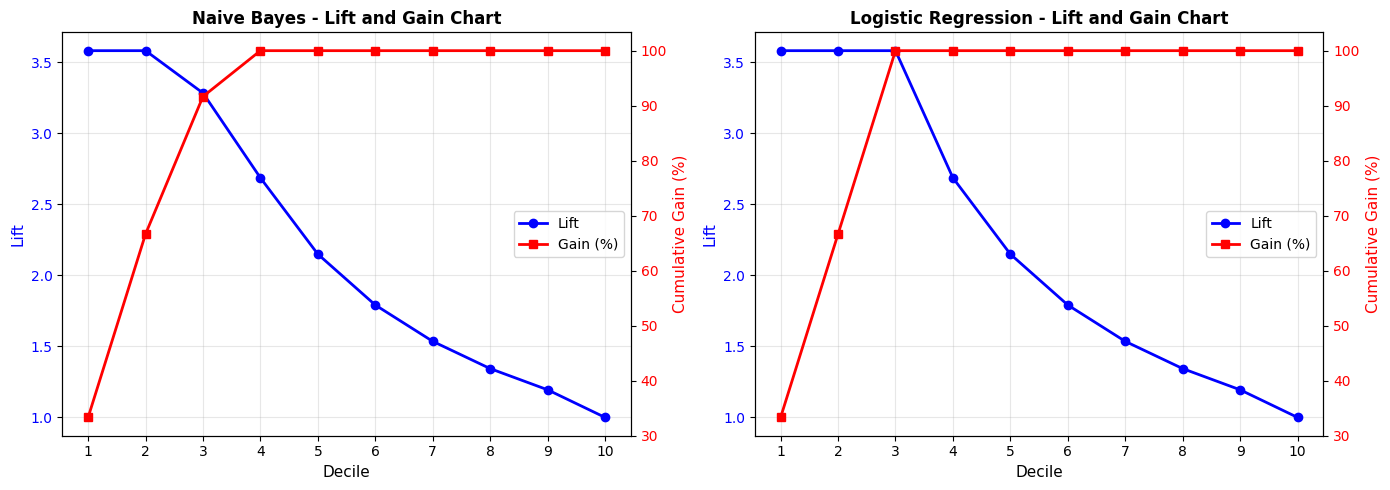


Naive Bayes - Lift and Gain by Decile:
Decile     Lift         Cum. Gain (%)  
1          3.5833       33.33          
2          3.5833       66.67          
3          3.2847       91.67          
4          2.6875       100.00         
5          2.1500       100.00         
6          1.7917       100.00         
7          1.5357       100.00         
8          1.3438       100.00         
9          1.1944       100.00         
10         1.0000       100.00         

Logistic Regression - Lift and Gain by Decile:
Decile     Lift         Cum. Gain (%)  
1          3.5833       33.33          
2          3.5833       66.67          
3          3.5833       100.00         
4          2.6875       100.00         
5          2.1500       100.00         
6          1.7917       100.00         
7          1.5357       100.00         
8          1.3438       100.00         
9          1.1944       100.00         
10         1.0000       100.00         


In [ ]:
import matplotlib.pyplot as plt

def calculate_lift_gain(y_true, y_proba, n_deciles=10):
    """Calculate lift and cumulative gain for each decile."""
    # Create dataframe with actual values and predicted probabilities
    df = pd.DataFrame({'actual': y_true, 'proba': y_proba})

    # Sort by probability descending (highest prob first)
    df = df.sort_values('proba', ascending=False).reset_index(drop=True)

    # Calculate total positives and baseline rate
    total_positives = df['actual'].sum()
    total_samples = len(df)
    baseline_rate = total_positives / total_samples

    # Calculate decile boundaries
    decile_size = total_samples // n_deciles

    deciles = []
    lifts = []
    gains = []

    cumulative_positives = 0

    for i in range(1, n_deciles + 1):
        # Get samples up to this decile
        end_idx = i * decile_size if i < n_deciles else total_samples
        start_idx = (i - 1) * decile_size

        # Positives in this decile
        decile_positives = df['actual'].iloc[start_idx:end_idx].sum()
        cumulative_positives += decile_positives

        # Cumulative gain: % of total positives captured
        gain = (cumulative_positives / total_positives) * 100

        # Lift: ratio of response rate in decile vs baseline
        cumulative_samples = end_idx
        cumulative_rate = cumulative_positives / cumulative_samples
        lift = cumulative_rate / baseline_rate

        deciles.append(i)
        lifts.append(lift)
        gains.append(gain)

    return deciles, lifts, gains

# Calculate lift and gain for both models (using test data)
nb_deciles, nb_lift, nb_gain = calculate_lift_gain(y_test, nb_test_proba)
lr_deciles, lr_lift, lr_gain = calculate_lift_gain(y_test, lr_test_proba)

# Create dual y-axis plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Naive Bayes plot
ax1 = axes[0]
ax1_twin = ax1.twinx()

line1, = ax1.plot(nb_deciles, nb_lift, 'b-o', label='Lift', linewidth=2, markersize=6)
line2, = ax1_twin.plot(nb_deciles, nb_gain, 'r-s', label='Gain (%)', linewidth=2, markersize=6)

ax1.set_xlabel('Decile', fontsize=11)
ax1.set_ylabel('Lift', color='blue', fontsize=11)
ax1_twin.set_ylabel('Cumulative Gain (%)', color='red', fontsize=11)
ax1.set_title('Naive Bayes - Lift and Gain Chart', fontsize=12, fontweight='bold')
ax1.set_xticks(nb_deciles)
ax1.tick_params(axis='y', labelcolor='blue')
ax1_twin.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3)
ax1.legend([line1, line2], ['Lift', 'Gain (%)'], loc='center right')

# Logistic Regression plot
ax2 = axes[1]
ax2_twin = ax2.twinx()

line3, = ax2.plot(lr_deciles, lr_lift, 'b-o', label='Lift', linewidth=2, markersize=6)
line4, = ax2_twin.plot(lr_deciles, lr_gain, 'r-s', label='Gain (%)', linewidth=2, markersize=6)

ax2.set_xlabel('Decile', fontsize=11)
ax2.set_ylabel('Lift', color='blue', fontsize=11)
ax2_twin.set_ylabel('Cumulative Gain (%)', color='red', fontsize=11)
ax2.set_title('Logistic Regression - Lift and Gain Chart', fontsize=12, fontweight='bold')
ax2.set_xticks(lr_deciles)
ax2.tick_params(axis='y', labelcolor='blue')
ax2_twin.tick_params(axis='y', labelcolor='red')
ax2.grid(True, alpha=0.3)
ax2.legend([line3, line4], ['Lift', 'Gain (%)'], loc='center right')

plt.tight_layout()
plt.show()

# Print numeric values
print("\nNaive Bayes - Lift and Gain by Decile:")
print(f"{'Decile':<10} {'Lift':<12} {'Cum. Gain (%)':<15}")
for d, l, g in zip(nb_deciles, nb_lift, nb_gain):
    print(f"{d:<10} {l:<12.4f} {g:<15.2f}")

print("\nLogistic Regression - Lift and Gain by Decile:")
print(f"{'Decile':<10} {'Lift':<12} {'Cum. Gain (%)':<15}")
for d, l, g in zip(lr_deciles, lr_lift, lr_gain):
    print(f"{d:<10} {l:<12.4f} {g:<15.2f}")

**Evaluate the Lift and Gain charts t**

Top of each model is over 3x better than random, LR gets to 100% by the 3rd decile while NB gets there in the 4th.

***4. Model Performance Comparison:***


Based on all the tests, Logistic Regression out-performs Naive Bayes, even though both models had nearly identical accuracy in test evaluation. The way that LR out-performs is more subtle. While both models are ultimately *extremely* accurate at predicting the type of penguin (chinstrap versus adelie), the logistic regression's descrimiator must be slightly more precise, as evidenced by the higher AUC. We also see that the quality of the LR predictions is better. Though both models are completely accurate for the large majority of samples, the LR captures all of its positives one entire decile faster than NB, indicating that the LR model raised true positives to the top of it's predictions faster (eg more aggressively) than NB, so a larger portion of its highest-scoring cases are correct.

***5. Performance on a Complex Dataset:***


In [ ]:
# Ok, repeat!

# Load MNIST dataset
mnist_train = tfds.load('mnist', split='train', shuffle_files=True)
mnist_test = tfds.load('mnist', split='test', shuffle_files=True)

# Convert to numpy arrays; linear model needs a fixed-length input
def extract_mnist_data(dataset):
    images = []
    labels = []
    for example in dataset:
        # Flatten 28x28 image to 784 features and normalize to [0,1]
        img = example['image'].numpy().flatten() / 255.0
        label = example['label'].numpy()
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

X_train_mnist, y_train_mnist = extract_mnist_data(mnist_train)
X_test_mnist, y_test_mnist = extract_mnist_data(mnist_test)

# Little different, MNIST has train/test splits already so we just got them.

print(f"Features: {X_train_mnist.shape[1]}")
print(f"Classes: {len(np.unique(y_train_mnist))}") # Better be 10

# Train Naive Bayes Model
print("\nTraining Naive Bayes...") # Should take longer
nb_mnist = GaussianNB()
nb_mnist.fit(X_train_mnist, y_train_mnist)

nb_train_pred_mnist = nb_mnist.predict(X_train_mnist)
nb_test_pred_mnist = nb_mnist.predict(X_test_mnist)

nb_train_acc_mnist = accuracy_score(y_train_mnist, nb_train_pred_mnist)
nb_test_acc_mnist = accuracy_score(y_test_mnist, nb_test_pred_mnist)

print("Naive Bayes Model Results:")
print(f"  Training Accuracy: {nb_train_acc_mnist}")
print(f"  Test Accuracy: {nb_test_acc_mnist}")


# Train Logistic Regression Model
lr_mnist = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
lr_mnist.fit(X_train_mnist, y_train_mnist)

lr_train_pred_mnist = lr_mnist.predict(X_train_mnist)
lr_test_pred_mnist = lr_mnist.predict(X_test_mnist)

lr_train_acc_mnist = accuracy_score(y_train_mnist, lr_train_pred_mnist)
lr_test_acc_mnist = accuracy_score(y_test_mnist, lr_test_pred_mnist)

print("Logistic Regression Model Results:")
print(f"  Training Accuracy: {lr_train_acc_mnist}")
print(f"  Test Accuracy: {lr_test_acc_mnist} ")



# Calculate multi-class AUC
nb_proba_mnist = nb_mnist.predict_proba(X_test_mnist)
lr_proba_mnist = lr_mnist.predict_proba(X_test_mnist)

nb_auc_mnist = roc_auc_score(y_test_mnist, nb_proba_mnist, multi_class='ovr')
lr_auc_mnist = roc_auc_score(y_test_mnist, lr_proba_mnist, multi_class='ovr')

# Print results
print("\n\nAUC Comparison")
print(f"Naive Bayes:\n  Test AUC: {nb_auc_mnist}")
print(f"\nLogistic Regression:\n  Test AUC: {lr_auc_mnist}")


Features: 784
Classes: 10

Training Naive Bayes...
Naive Bayes Model Results:
  Training Accuracy: 0.5649
  Test Accuracy: 0.5558
Logistic Regression Model Results:
  Training Accuracy: 0.9387166666666666
  Test Accuracy: 0.9262 


AUC Comparison
Naive Bayes:
  Test AUC: 0.9321466626384792

Logistic Regression:
  Test AUC: 0.9938619151241849


Compare how the performance differs when dealing with image data

We're seeing how individual pixel values in an image don't contribute to a classifier in the same way that individual stats about a penguin's physiology do. This makes intuitive sense. The penguin features are chosen naturally as traits that are easy enough to observe that we've elected them as attributes. in MNIST, Naive Bayes can't accurately resolve how likely any particular set of 784 pixels is to be a specific digit, so it falls badly, and LR keeps up performance because it only needs to find a dividing line separating a digit from the others, but loses accuracy still. I suspect that LR only remains as high as 92% because the MNIST digits samples are tightly cropped, so there's still some correlation between some pixel locations and some possible classifications.

Discuss the differences in performance and behavior across these datasets

Across datasets, LR performed consistently higher. Since we really only care about separating into classes, it is generally more reliable to predict how some noteworthy common features set one class apart from the others than to resolve an "average concept" of what members of a class "look like" (or have measurements like).

We do see across datasets that AUC remains high, even when accuracy drops. So, the NB classifier, despite its low accuracy, still did well ranking true positives higher for their class than for other classes; it just has a "blurrier" concept of what data makes up each class and is capable of more false positives.